In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import calendar
from collections import Counter


In [2]:




data = pd.read_json("../data/disorders_all_sections_fixed.json")


data.replace("", np.nan, inplace=True)

data_t = data.copy()
data_t['total_word_count'] = data.apply(lambda x: sum(len(str(val).split(" ")) for val in x), axis=1)





In [3]:
# Get the number of rows and columns
num_rows, num_cols = data.shape

print(f"The dataset has {num_rows} rows and {num_cols} columns.")

# Get the column names
col_names = data.columns

print(f"The column names are: {', '.join(col_names)}.")

summary = data.describe()

# Print the summary
print(summary)



The dataset has 685 rows and 15 columns.
The column names are: name, type, link, description, content, causes, symptoms, treatment, diagnosis, prevention, epidemiology, wikidata_id, wikidata_url, wikidata_url_json, number_of_revisions.
                      name                   type  \
count                  685                    685   
unique                 685                     26   
top     Zellweger syndrome  neurological disorder   
freq                     1                    385   

                                           link  \
count                                       685   
unique                                      606   
top     https://en.wikipedia.org/wiki/Cathinone   
freq                                         11   

                                              description  \
count                                                 683   
unique                                                544   
top     Cathinone is a monoamine alkaloid found in the...  

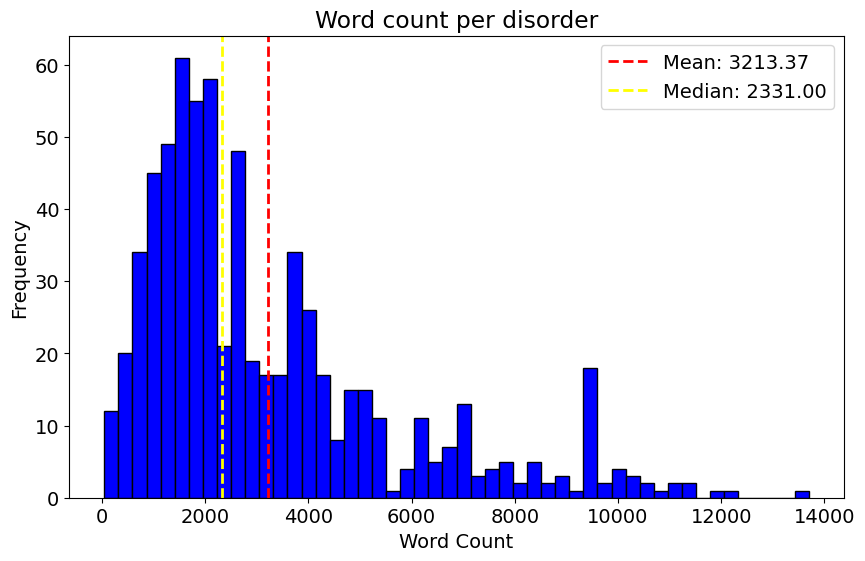

In [23]:
import scipy.stats as stats

# Calculate the mean, mode, and median
mean = data_t['total_word_count'].mean()

median = data_t['total_word_count'].median()

# Plot a histogram of the total word counts
plt.figure(figsize=(10,6))
plt.hist((data_t['total_word_count']), bins=50, color='blue', edgecolor='black')

# Add vertical lines for the mean, mode, and median
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

# Add a legend
plt.legend()

plt.title('Word count per disorder')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.savefig('plots/Word_count_per_disorder.png')
plt.show()


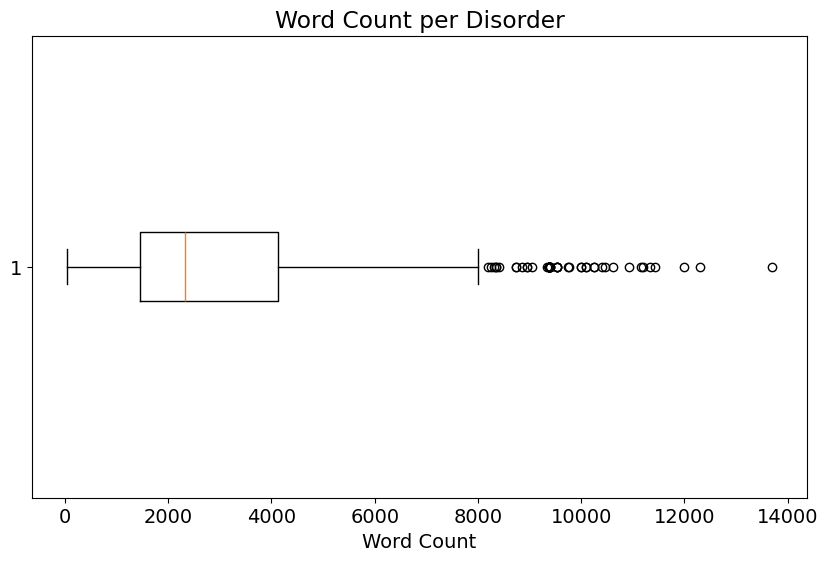

In [22]:
plt.figure(figsize=(10,6))
plt.boxplot(data_t['total_word_count'], vert=False)
plt.title('Word Count per Disorder')
plt.xlabel('Word Count')
plt.savefig('plots/Word_count_per_disorder_box.png')
plt.show()

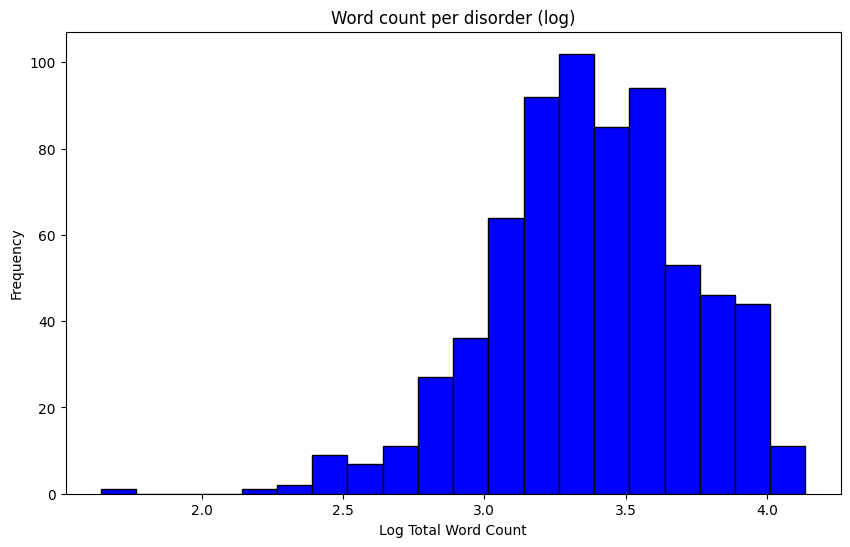

In [6]:

log_total_word_count = np.log10(data_t['total_word_count'])

plt.figure(figsize=(10,6))
plt.hist(log_total_word_count, bins=20, color='blue', edgecolor='black')
plt.title('Word count per disorder (log)')
plt.xlabel('Log Total Word Count')
plt.ylabel('Frequency')
plt.savefig('plots/Word_count_per_disorder_LOG.png')
plt.show()



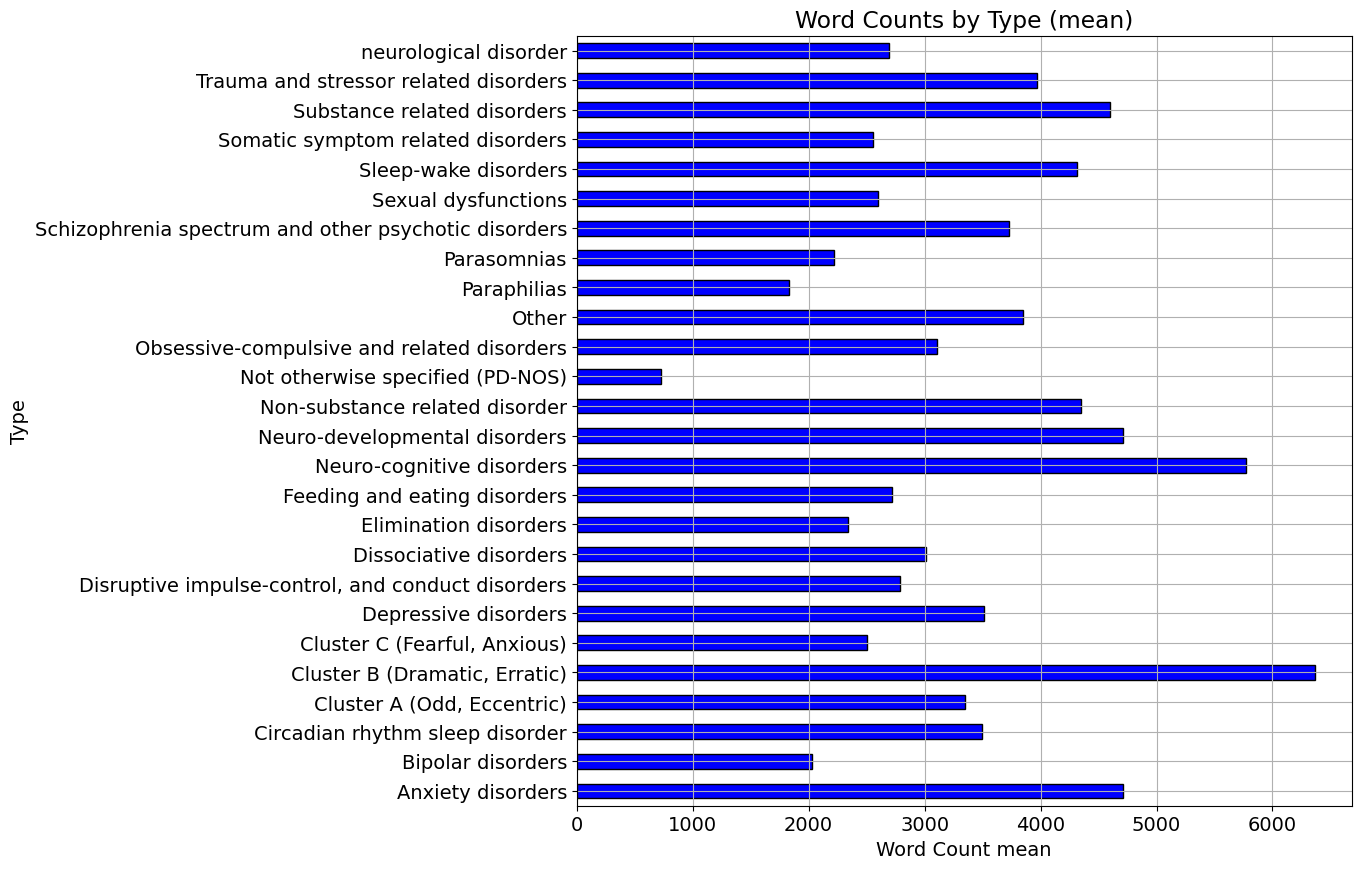

In [7]:





plt.figure(figsize=(10,10))  # Increase the figure size
plt.rcParams.update({'font.size': 14})  # Increase the font size

grouped_data = data_t.groupby('type')['total_word_count'].mean()

# Create a mean bar plot of the total word counts by type
grouped_data.plot(kind='barh', color='blue', edgecolor='black')

plt.title('Word Counts by Type (mean)')
plt.ylabel('Type')
plt.xlabel('Word Count mean')

plt.grid(True)  # Add grid

#plt.tight_layout()  # Adjust the layout
plt.savefig('plots/Word_Count_by_Type_mean.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()


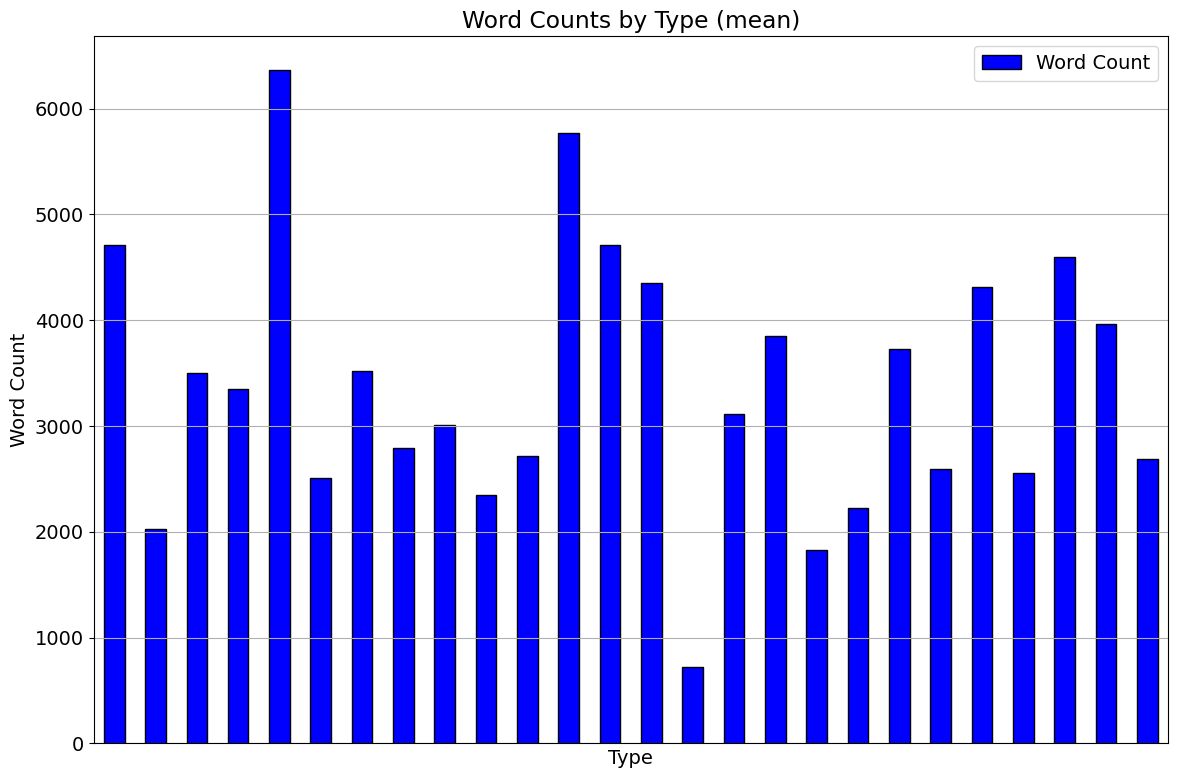

In [8]:
plt.figure(figsize=(12,8))  # Increase the figure size
plt.rcParams.update({'font.size': 14})  # Increase the font size

grouped_data = data_t.groupby('type')['total_word_count'].mean()

# Create a mean bar plot of the total word counts by type
grouped_data.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Word Counts by Type (mean)')
plt.xlabel('Types')
plt.ylabel('Word Count')

plt.xticks([])  # Remove x-axis labels
plt.legend(['Word Count'])  # Add a legend

plt.grid(True)  # Add grid

plt.tight_layout()  # Adjust the layout
plt.savefig('plots/Word_Count_by_Type_mean_noX.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

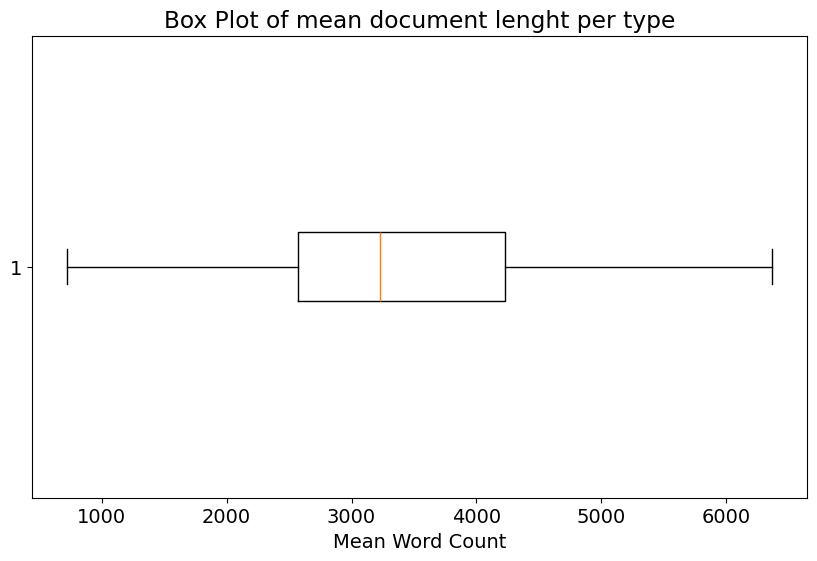

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.boxplot(grouped_data, vert=False)
plt.title('Box Plot of mean document lenght per type')
plt.xlabel('Mean Word Count')
plt.savefig('plots/mean_count_per_type_box_plot.png')
plt.show()

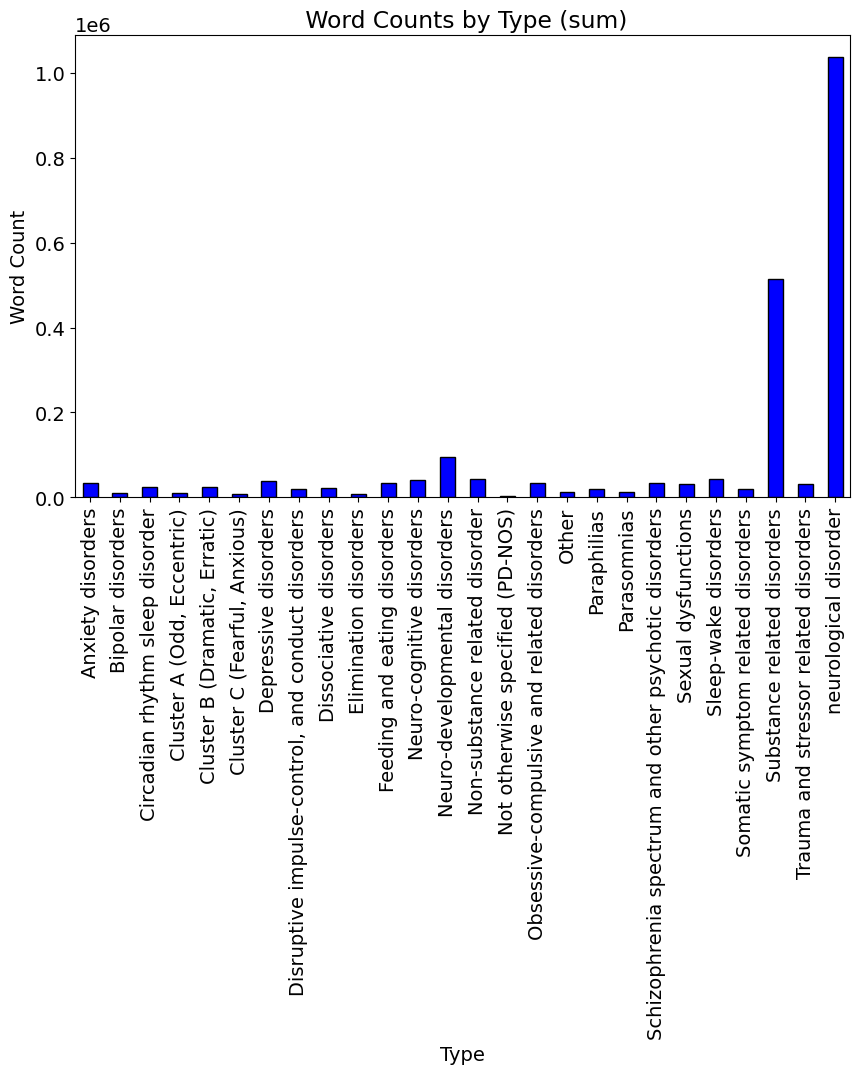

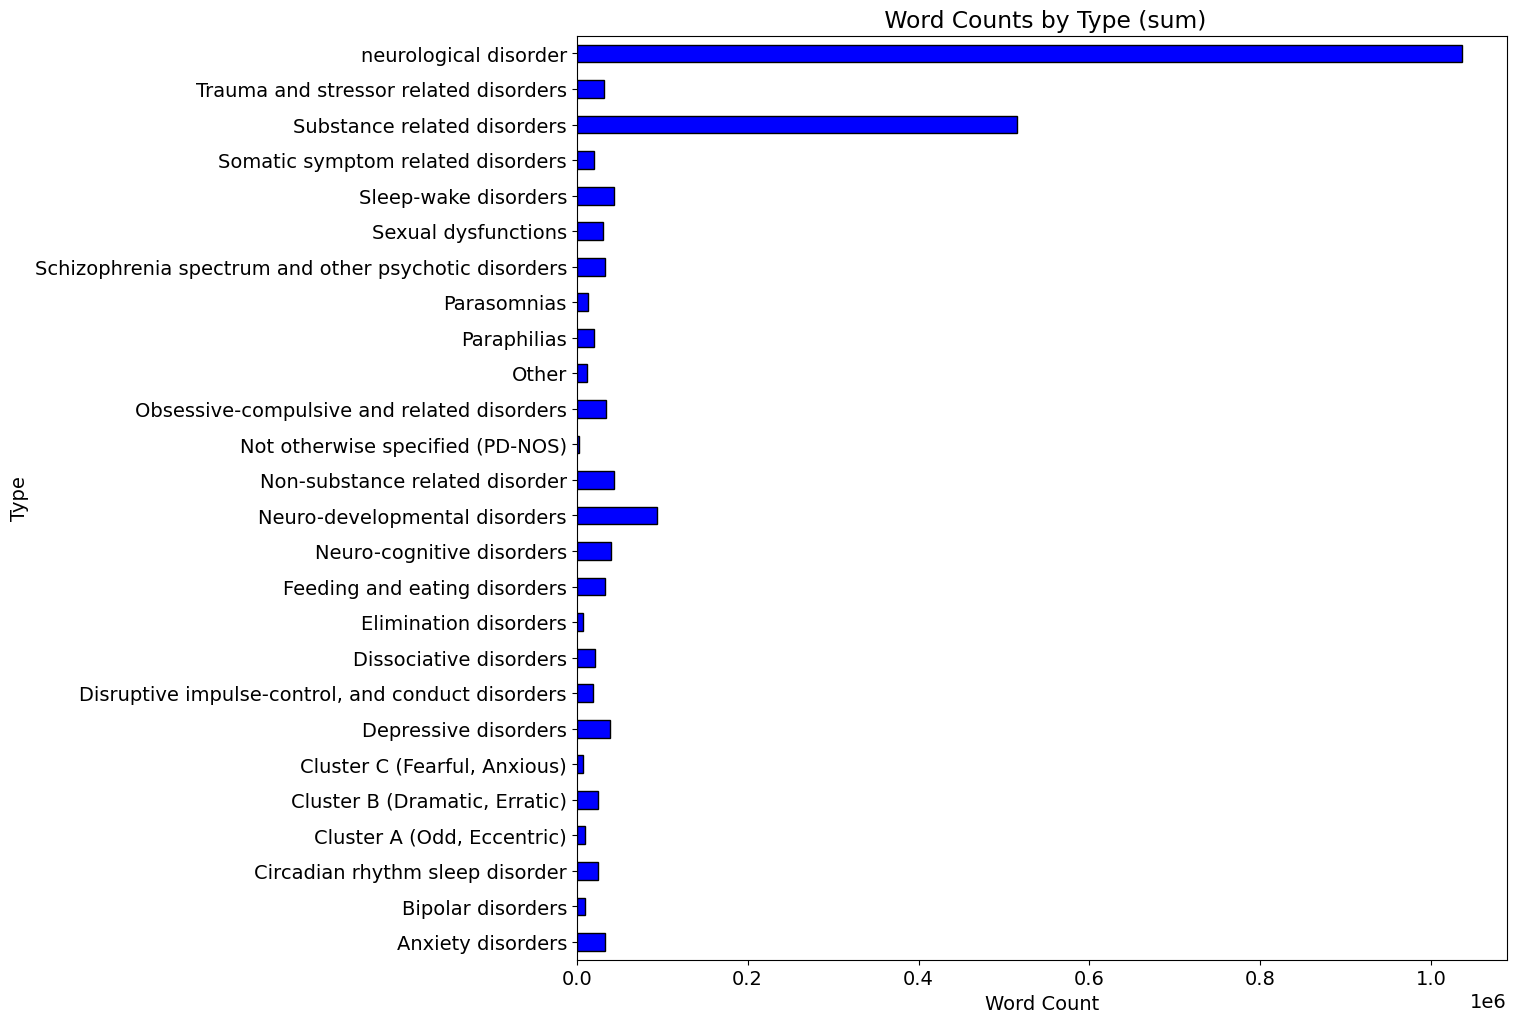

In [10]:


grouped_data = data_t.groupby('type')['total_word_count'].sum()


# Create a mean bar plot of the total word counts by type
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', color='blue', edgecolor='black')
plt.title(' Word Counts by Type (sum)')
plt.xlabel('Type')
plt.ylabel('Word Count')
plt.savefig('plots/Word_count_by_type_sum.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()


plt.figure(figsize=(12,12))  # Increase the height here
grouped_data.plot(kind='barh', color='blue', edgecolor='black')
plt.title(' Word Counts by Type (sum)')
plt.ylabel('Type')
plt.xlabel('Word Count')
plt.savefig('plots/Word_count_by_type_sum_barh.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

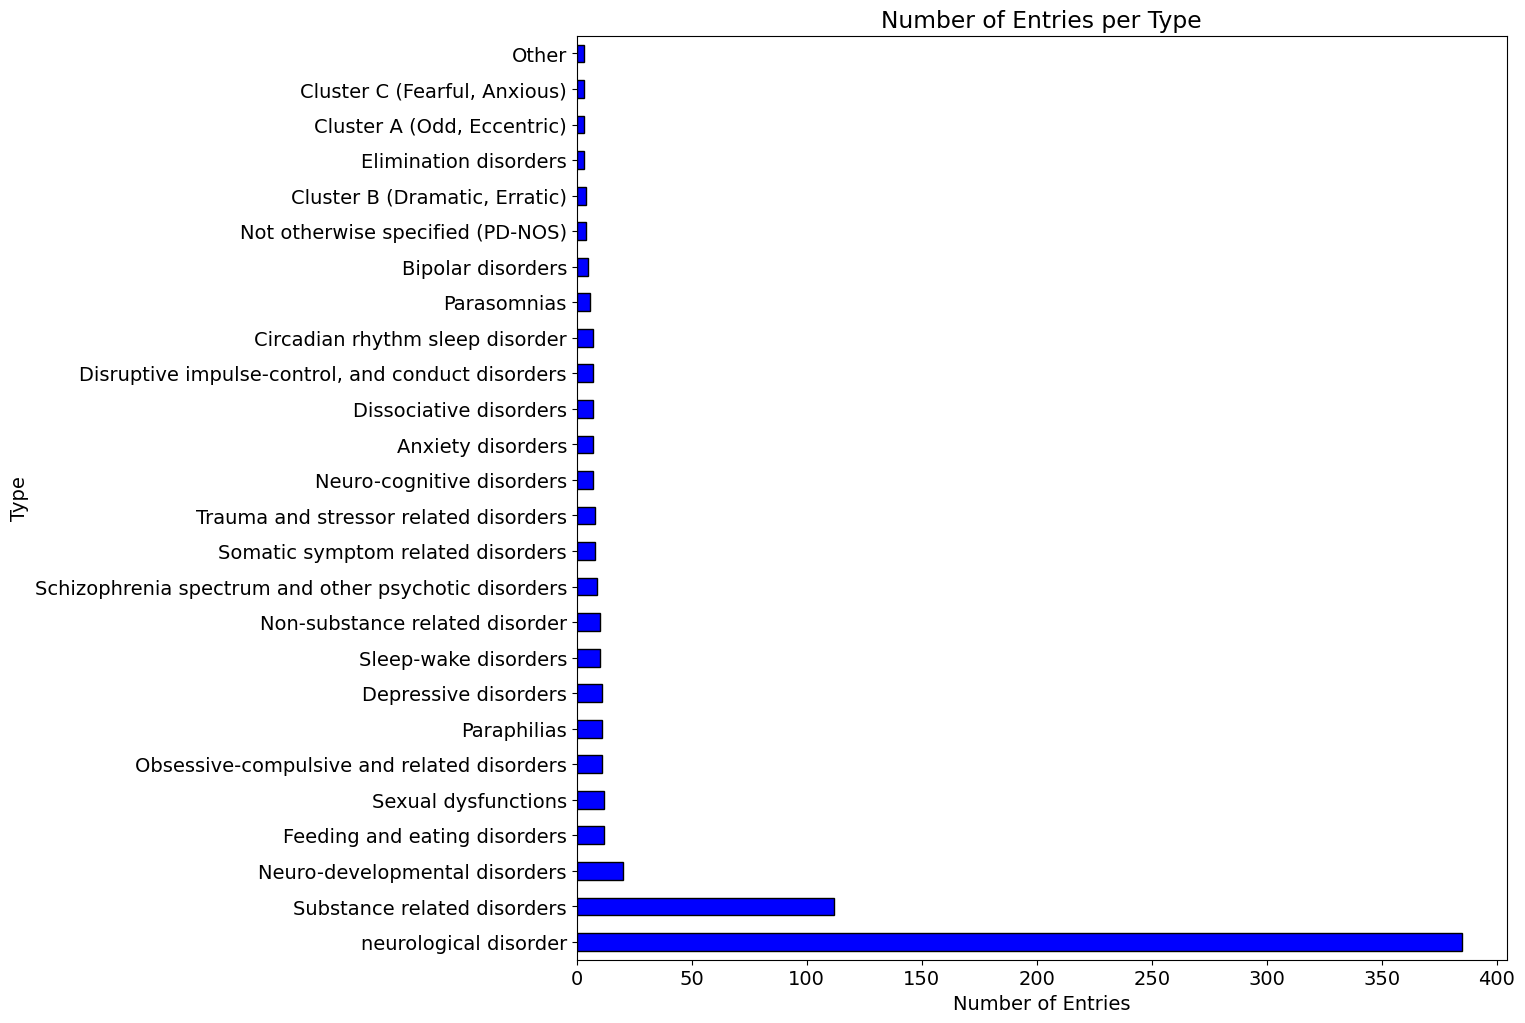

In [11]:


entries_per_type = data_t['type'].value_counts()

plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 14})
entries_per_type.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Number of Entries per Type')
plt.ylabel('Type')
plt.xlabel('Number of Entries')
plt.savefig('plots/Number_of_Entries_per_Type.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)

plt.show()



C:\Users\Toni\AppData\Local\Temp\ipykernel_12456\2186492948.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = data.applymap(word_count)


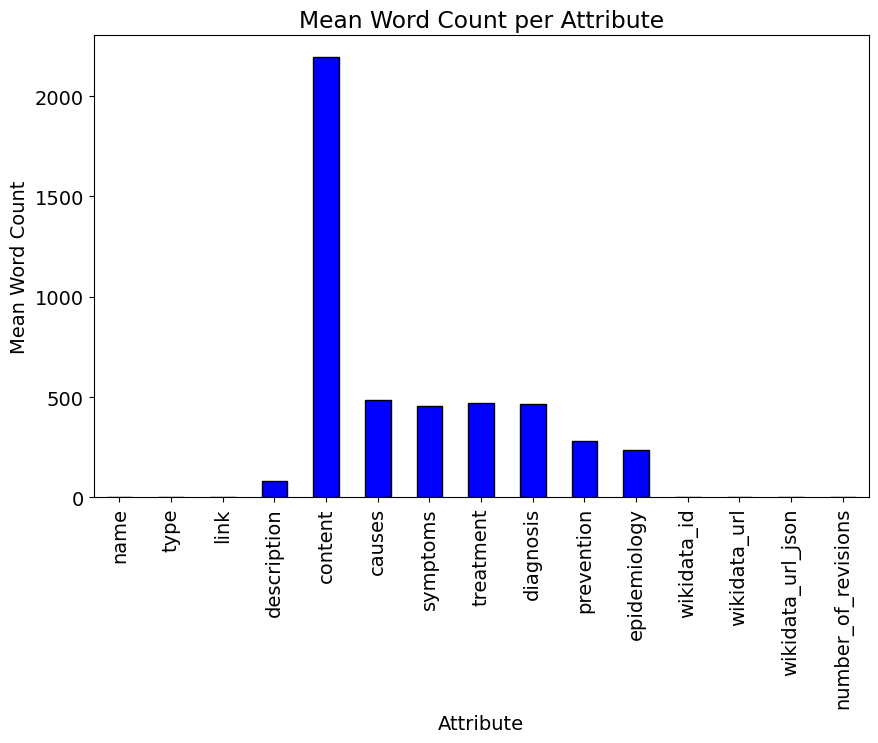

In [12]:
def word_count(text):
    # Check if the text is not NaN
    if pd.notna(text):
        # Calculate the word count
        return len(str(text).split())
    else:
        return np.nan

# Apply the function to each cell in the DataFrame
word_counts = data.applymap(word_count)

# Calculate the mean word count for each column, ignoring the NaN values
mean_word_counts = word_counts.mean()

# Plot the mean word count for each attribute
plt.figure(figsize=(10,6))
mean_word_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Mean Word Count per Attribute')
plt.xlabel('Attribute')
plt.ylabel('Mean Word Count')
plt.savefig('plots/Mean_Word_Count_per_Attribute.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()



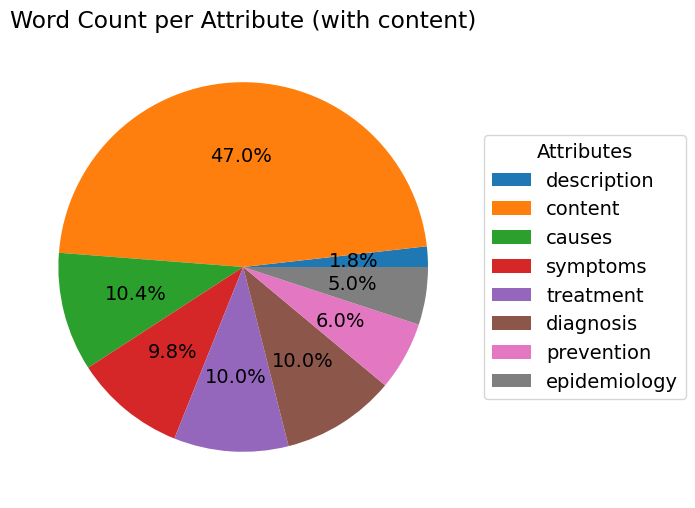

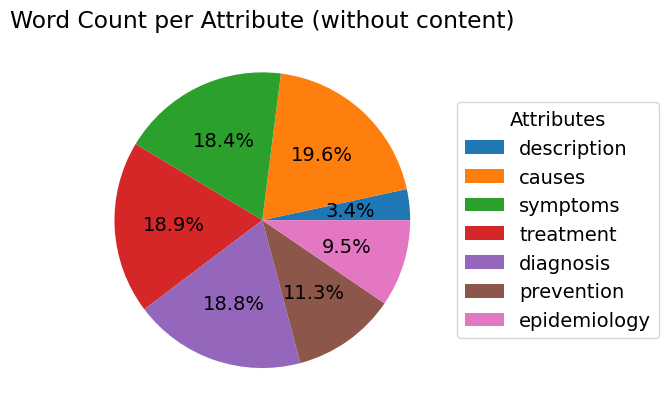

In [13]:


attributes_to_include = ['content','causes', 'description', 'diagnosis', 'epidemiology', 'treatment', 'symptoms', 'prevention']

# Filter the mean_word_counts Series to only include the desired attributes
filtered_word_counts = mean_word_counts[mean_word_counts.index.isin(attributes_to_include)]

# Plot the mean word count for each attribute as a pie chart
plt.figure(figsize=(10,6))
# Create the pie chart without labels on the pie slices
wedges, texts, autotexts = plt.pie(filtered_word_counts, autopct='%1.1f%%')
# Create a legend with the attribute names
plt.legend(wedges, filtered_word_counts.index, title="Attributes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Word Count per Attribute (with content)')
plt.savefig('plots/Word_Count_per_Attribute_content.png')
plt.show()


attributes_to_include = ['causes', 'description', 'diagnosis', 'epidemiology', 'treatment', 'symptoms', 'prevention']
filtered_word_counts = mean_word_counts[mean_word_counts.index.isin(attributes_to_include)]
wedges, texts, autotexts = plt.pie(filtered_word_counts, autopct='%1.1f%%')

plt.legend(wedges, filtered_word_counts.index, title="Attributes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Word Count per Attribute (without content)')
plt.savefig('plots/Word_Count_per_Attribute_pie.png')
plt.show()



In [14]:

# Calculate the number of empty fields in the DataFrame
num_empty_fields = data.isnull().sum().sum()

# Print the number of empty fields
print(num_empty_fields)

2016


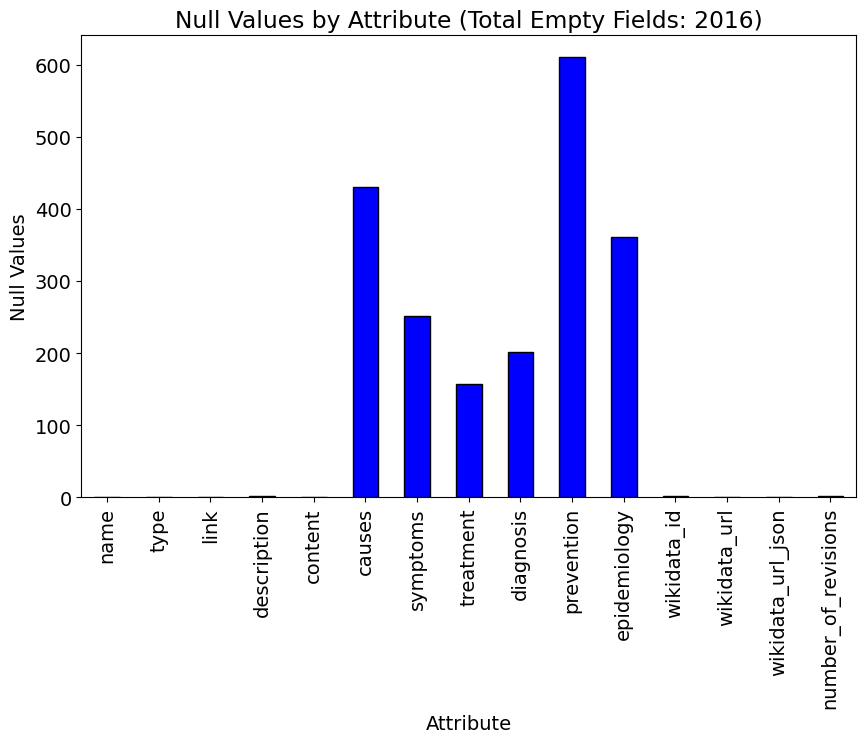

In [15]:
# Create a new DataFrame where each cell is either True (if the original cell is null) or False
is_null_df = data.isnull()

# Sum the True values in each column to get the number of null values in each column
num_null_values = is_null_df.sum()

# Create a bar plot of the total null values by attribute
plt.figure(figsize=(10,6))
num_null_values.plot(kind='bar', color='blue', edgecolor='black')
plt.title(f'Null Values by Attribute (Total Empty Fields: {num_empty_fields})')
plt.xlabel('Attribute')
plt.ylabel('Null Values')
plt.savefig('plots/Null_Values_by_Attribute.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

C:\Users\Toni\AppData\Local\Temp\ipykernel_12456\3242915752.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  num_null_values = data_t.groupby('type').apply(lambda x: x.isnull().sum().sum())


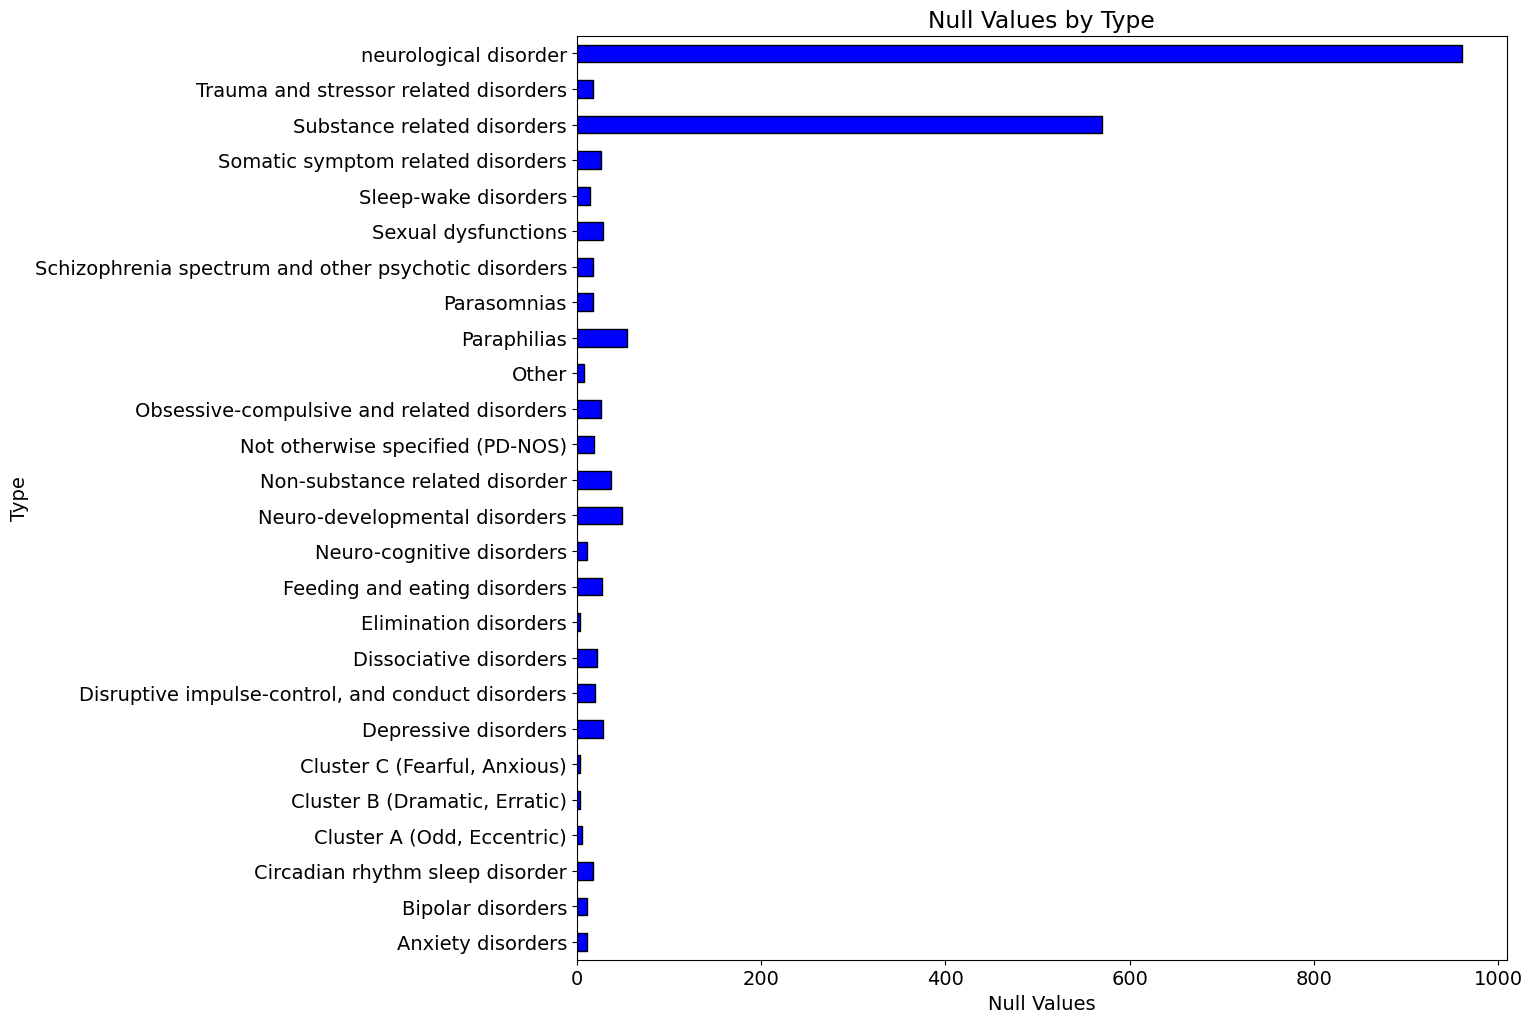

In [16]:
import matplotlib.pyplot as plt

num_null_values = data_t.groupby('type').apply(lambda x: x.isnull().sum().sum())

plt.figure(figsize=(12,12))
num_null_values.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Null Values by Type')
plt.ylabel('Type')
plt.xlabel('Null Values')
plt.savefig('plots/Null_Values_by_Type.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()

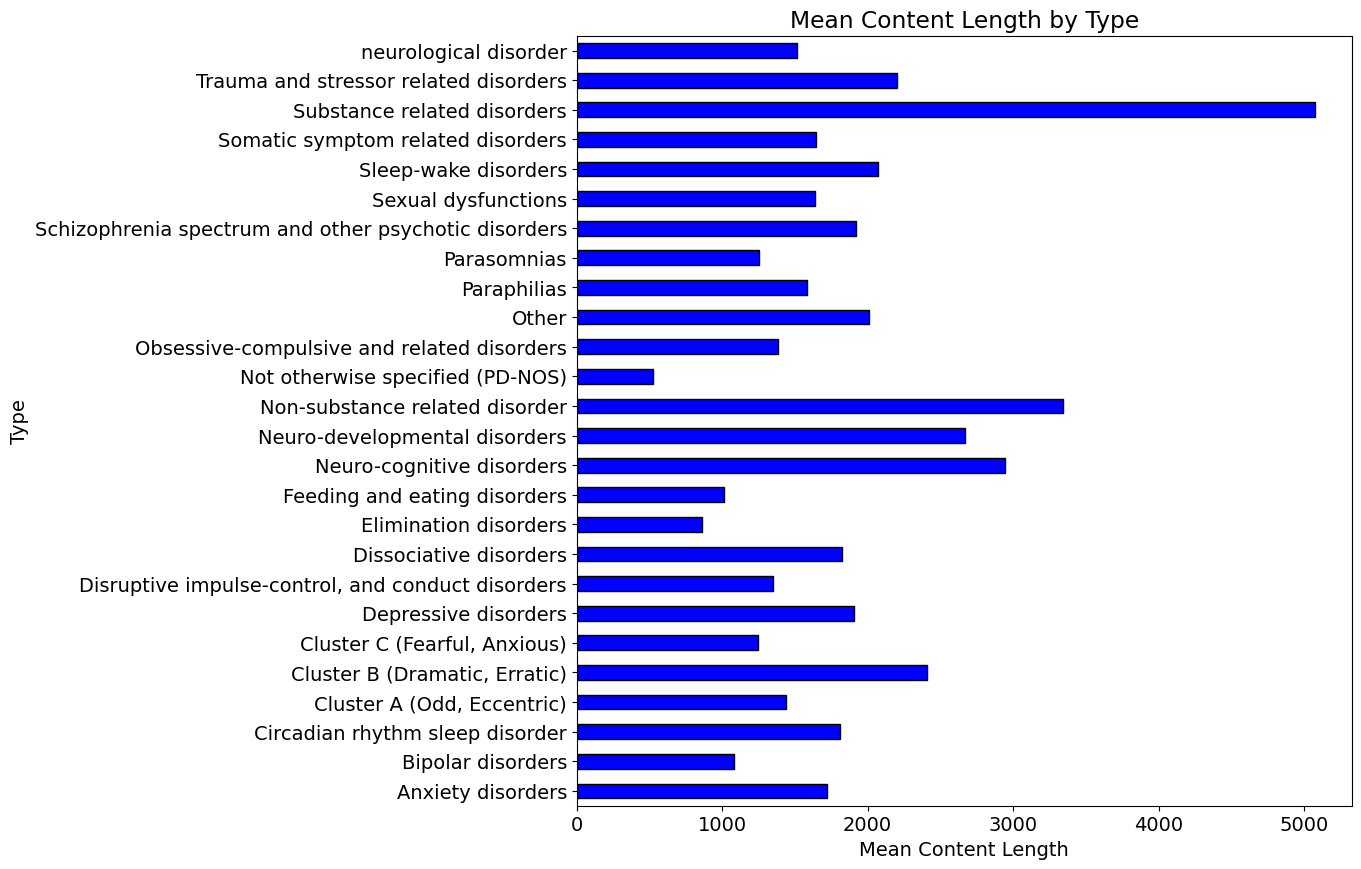

In [17]:
# Create a new column 'content_length' that calculates the number of words in the 'content' attribute
data_t['content_length'] = data_t['content'].apply(lambda x: len(str(x).split()))

# Group the DataFrame by 'type' and calculate the mean length of the 'content' attribute for each group
grouped_data = data_t.groupby('type')['content_length'].mean()

# Create a horizontal bar plot of the mean length of the 'content' attribute for each group
plt.figure(figsize=(10,10))
grouped_data.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Mean Content Length by Type')
plt.ylabel('Type')
plt.xlabel('Mean Content Length')
plt.savefig('plots/Mean_Content_Length_by_Type.png', dpi=500, format='png', bbox_inches='tight', pad_inches=0.1)
plt.show()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Toni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


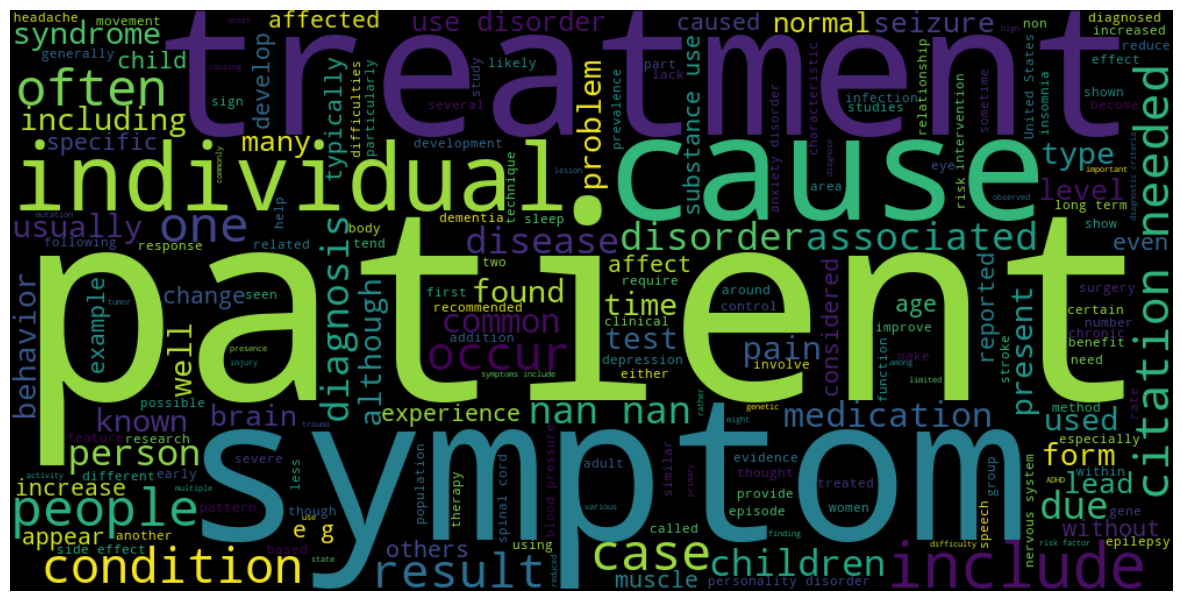

In [18]:



from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')




#Text Analaysis 

# Select the text columns
text_columns = data_t[['causes', 'description', 'diagnosis','epidemiology','treatment','symptoms', 'prevention']]

# Concatenate the values in each row
all_text = text_columns.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


# Get the list of stop words in English
stop_words = stopwords.words('english') + ["may"]

def remove_stopwords(text):
    # Split the text into words
    words = text.split()
    
    # Remove any stop words
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a single string and return it
    return ' '.join(words)

# Apply the function to your text data
all_text = all_text.apply(remove_stopwords)

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_text))
print(wordcloud)
# Display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plots/wordcloud.png')
plt.show()



In [19]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import string

# Get the list of stop words in English
stop_words = stopwords.words('english') + ["may", "The","In"] 

# Select the text columns
text_columns = data_t[['causes', 'description', 'diagnosis','epidemiology','treatment','symptoms', 'prevention']]

# Concatenate the text columns into a single string for each row
data_t['all_text'] = text_columns.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Group by 'type' and concatenate all the text for each group
grouped_text = data_t.groupby('type')['all_text'].apply(lambda x: ' '.join(x))

# Initialize a dictionary to hold the top words for each type
top_words = {}

# For each type
for type, text in grouped_text.items():
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Count the frequency of each word
    word_freq = Counter(words)

    # Get the top 10 words
    top = word_freq.most_common(10)

    # Add the top words to the dictionary
    top_words[type] = top

# Print the top words for each type
for type, words in top_words.items():
    print(f"Type: {type}")
    for word, freq in words:
        print(f"    {word}: {freq}")


Type: Anxiety disorders
    anxiety: 279
    social: 221
    disorder: 205
    panic: 161
    treatment: 88
    people: 87
    therapy: 87
    children: 85
    symptoms: 81
    use: 80
Type: Bipolar disorders
    disorder: 84
    bipolar: 66
    symptoms: 51
    bpii: 49
    depressive: 47
    mood: 45
    episode: 41
    episodes: 38
    hypomanic: 35
    patients: 35
Type: Circadian rhythm sleep disorder
    sleep: 397
    insomnia: 124
    time: 83
    disorder: 71
    melatonin: 70
    light: 56
    circadian: 53
    treatment: 51
    patients: 49
    use: 49
Type: Cluster A (Odd, Eccentric)
    personality: 83
    disorder: 71
    people: 67
    szpd: 59
    schizoid: 45
    social: 34
    stpd: 31
    others: 29
    also: 27
    disorders: 25
Type: Cluster B (Dramatic, Erratic)
    bpd: 188
    disorder: 152
    personality: 141
    individuals: 99
    aspd: 87
    disorders: 80
    emotional: 70
    behavior: 56
    people: 55
    also: 55
Type: Cluster C (Fearful, Anxious)
    

+----+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|    | type                                                 | top words                                                                                                          |
|----+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------|
|  0 | Anxiety disorders                                    | anxiety, social, disorder, panic, treatment, people, therapy, children, symptoms, use                              |
|  1 | Bipolar disorders                                    | disorder, bipolar, symptoms, bpii, depressive, mood, episode, episodes, hypomanic, patients                        |
|  2 | Circadian rhythm sleep disorder                      | sleep, insomnia, time, disorder, melatonin,

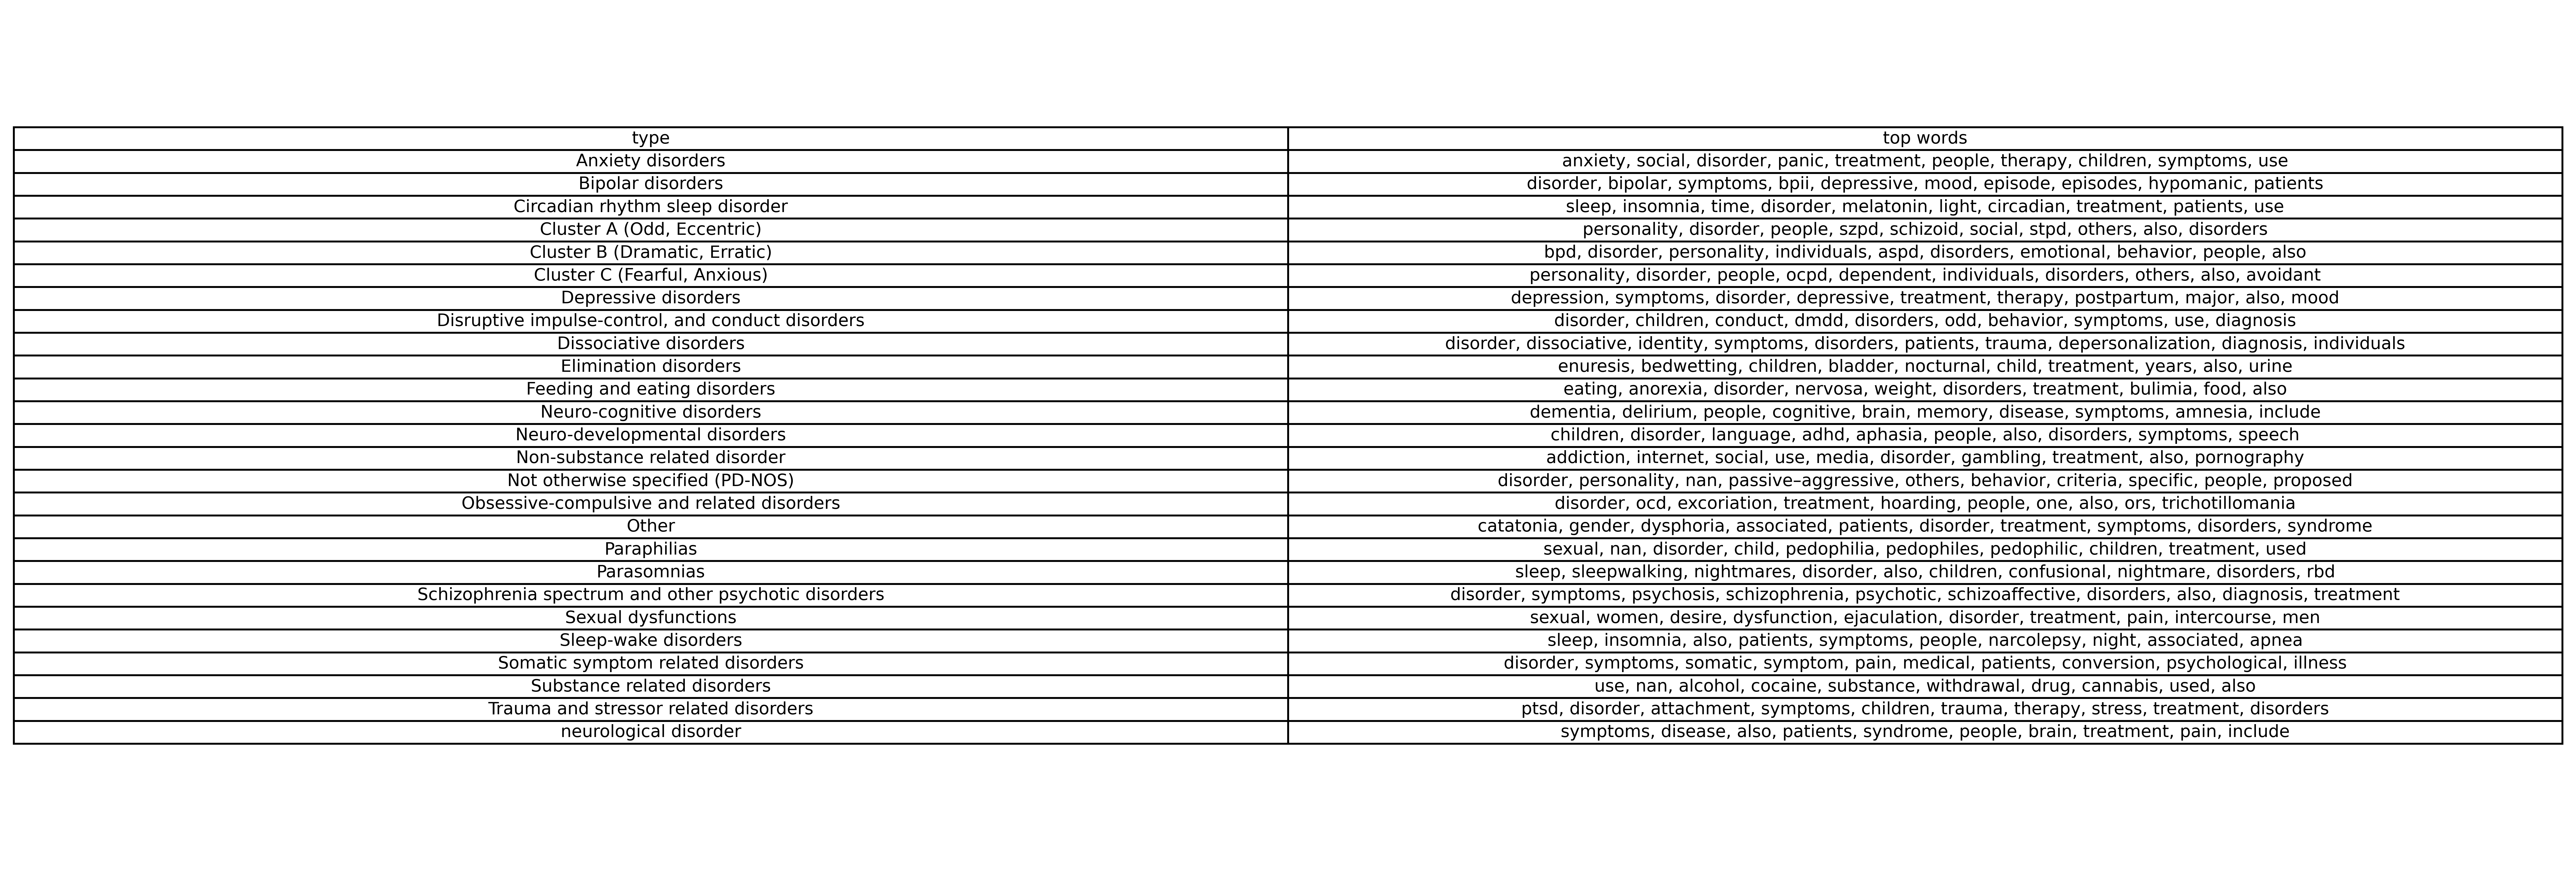

In [20]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Increase the font size
plt.rcParams['font.size'] = 14

# Initialize an empty DataFrame to hold the top words for each type
top_words_list = []

# For each type
for type, text in grouped_text.items():
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Count the frequency of each word
    word_freq = Counter(words)

    # Get the top 10 words
    top = word_freq.most_common(10)

    # Create a new row with the 'type' and the top 10 words
    new_row = {'type': type}
    top_row = ""
    for i, (word, freq) in enumerate(top):
        if i != 0:
            top_row += ", "
        top_row += word

    new_row["top words"] = top_row

    # Append the new row to the DataFrame
    top_words_list.append(new_row)

top_words_df = pd.DataFrame(top_words_list)

# Print the first ten rows of the DataFrame in a pretty table
print(tabulate(top_words_df, headers='keys', tablefmt='psql'))

# Save the DataFrame as a picture
fig, ax =plt.subplots(figsize=(24,8),dpi=500)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=top_words_df.values,colLabels=top_words_df.columns, cellLoc = 'center', loc='center')

plt.savefig('top_words_table.png',dpi=500)

In [21]:

"""
import spacy

# Load SpaCy's English NLP model
nlp = spacy.load('en_core_web_sm')

# Initialize an empty list to hold the named entities
named_entities = []

# Process each row of text in the 'all_text' column
for text in all_text:
    doc = nlp(text)

    # Extract the named entities found by the model
    entities = [(entity.text, entity.label_) for entity in doc.ents if entity.label_ not in ['CARDINAL', 'ORDINAL', 'PERCENT', 'PERSON']]

    # Append the entities to the named_entities list
    named_entities.append(entities)

# Print the named entities found by the model
for entities in named_entities:
    for entity in entities:
        print(f"{entity[0]} ({entity[1]})")
"""


'\nimport spacy\n\n# Load SpaCy\'s English NLP model\nnlp = spacy.load(\'en_core_web_sm\')\n\n# Initialize an empty list to hold the named entities\nnamed_entities = []\n\n# Process each row of text in the \'all_text\' column\nfor text in all_text:\n    doc = nlp(text)\n\n    # Extract the named entities found by the model\n    entities = [(entity.text, entity.label_) for entity in doc.ents if entity.label_ not in [\'CARDINAL\', \'ORDINAL\', \'PERCENT\', \'PERSON\']]\n\n    # Append the entities to the named_entities list\n    named_entities.append(entities)\n\n# Print the named entities found by the model\nfor entities in named_entities:\n    for entity in entities:\n        print(f"{entity[0]} ({entity[1]})")\n'